In [1]:
from inventory_impairment_class import InventoryImpairment
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.read_excel('./data/inventory_data_new.xlsx')

In [3]:
model = InventoryImpairment()
model.set_forecast_file("./forecast/timesnet.json")
# Fit the model
model.fit(data, variability=0.5)

Original Data shape: (1381, 17)
Created Stock data shape: (383, 17)
Calculating monthly data...
       material  unitats_2022  vendes_2022  preu_venda_unitari_2022  \
4   114230822.0     1018500.0     54892.49                 0.053895   
10  115030252.0       75900.0      6825.62                 0.089929   
15  115070602.0      884000.0    100307.84                 0.113470   
21  115130209.0       23217.0      5179.48                 0.223090   
23  115170581.0      357000.0     26188.50                 0.073357   
30  116211401.0      180000.0     20998.44                 0.116658   
36  116490250.0           NaN          NaN                      NaN   
37  116490259.0      152600.0     24814.65                 0.162612   
43  118030902.0      711900.0    100467.24                 0.141125   
44  118030904.0      376560.0     56967.80                 0.151285   

    unitats_2023  vendes_2023  preu_venda_unitari_2023  \
4       885500.0     58951.87                 0.066575   
10    

In [4]:
# Predict the impairment
impairment = model.predict(tolerance=1.5, use_mode=False)

INDEXS_INTERPRETATION CALLED WITH --> len auto_arima_indexs: (383,), len auto_encoder_indexs: (383,), len impairment_index: (383,), shape data: (383, 18)
NaN values in auto_encoder indexs start:  0
NaN values in auto_encoder indexs assign:  0
Rounded merged indexs: [0.26, 0.11, 0.0, 0.01, 0.26, 0.16, 0.22, 0.59, 0.52, 0.01, 0.0, 0.23, 0.27, 0.05, 0.01, 0.26, 0.45, 0.65, 0.17, 0.49, 0.0, 0.23, 0.0, 0.16, 0.11, 0.14, 0.3, 0.31, 0.56, 0.49, 0.15, 0.1, 0.63, 0.33, 0.03, 1.11, 0.33, 0.0, 0.36, 0.11, 0.06, 0.4, 0.0, 0.0, 0.01, 0.07, 0.16, 0.33, 0.0, 0.57, 0.12, 0.05, 0.5, 0.54, 0.27, 0.01, 0.7, 0.39, 0.08, 0.64, 0.06, 0.53, 0.56, 0.01, 0.01, 0.6, 0.53, 1.0, 0.27, 0.1, 0.26, 0.11, 0.34, 0.45, 0.94, 0.05, 0.0, 0.28, 0.5, 0.31, 0.18, 0.01, 0.12, 0.17, 0.17, 0.11, 0.86, 0.0, 0.0, 0.52, 0.76, 0.41, 0.1, 0.11, 0.15, 0.0, 0.11, 0.1, 0.45, 0.5, 0.46, 0.67, 0.39, 0.29, 0.5, 0.38, 0.24, 0.37, 0.14, 0.34, 0.21, 0.19, 0.15, 0.16, 0.14, 0.11, 0.38, 0.27, 0.27, 0.36, 1.22, 0.39, 0.08, 0.11, 0.11, 0.88, 0.

In [5]:
model.stock_management()

Recommendation for 114230822: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 414408.9103122262, Current stock: 66500.0, Fair price: 0.06422680707506798
Recommendation for 115030252: Reduce stock. Projected sales: 4369.750788446194, Current stock: 23000.0, Fair price: 0.08292316577614446
Recommendation for 115070602: Reduce stock. Projected sales: 10852.487390441633, Current stock: 100000.0, Fair price: 0.11218205577233863
Recommendation for 115130209: Reduce stock. Projected sales: 2320.0237631443674, Current stock: 9600.0, Fair price: 0.28486069892772803
Recommendation for 115170581: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 446181.05010579055, Current stock: 42000.0, Fair price: 0.0690478610883724
Recommendation for 116211401: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 491966.4580978691, Current stock: 36000.0, Fair price: 0.10418138320

In [6]:
impairment.head(30)

,index,material,unitats_2022,vendes_2022,preu_venda_unitari_2022,unitats_2023,vendes_2023,preu_venda_unitari_2023,variacio_preu_venda_unitari_2022_2023,proporcio_variacio_preu_venda_unitari_2022_2023,...,diferencia_entrada_sortida,stock_final_2023,valor_total_stock_2023,cost_unitari_stock_2023,auto_arima_index,autoencoder_index,impairment_index,merged_indexs,fair_price,new_value
0,4,114230822.0,1018500.0,54892.49,0.053895,885500.0,58951.87,0.066575,0.012679,0.235256,...,-15.0,66500.0,2292.96,0.034481,0.249710,0.005916,0.000000,0.255627,0.064227,0.034481
1,10,115030252.0,75900.0,6825.62,0.089929,27600.0,2127.68,0.077090,-0.012839,-0.142771,...,-50.0,23000.0,1777.15,0.077267,0.000000,0.060970,0.051069,0.112039,0.082923,0.077267
2,15,115070602.0,884000.0,100307.84,0.113470,340000.0,34522.45,0.101537,-0.011934,-0.105171,...,13.0,100000.0,5732.32,0.057323,0.000000,0.001825,0.000000,0.001825,0.112182,0.057323
3,21,115130209.0,23217.0,5179.48,0.223090,15600.0,3770.68,0.241710,0.018620,0.083465,...,13.0,9600.0,2298.10,0.239385,0.000000,0.000000,0.007279,0.007279,0.284861,0.239385
4,23,115170581.0,357000.0,26188.50,0.073357,1023000.0,74195.50,0.072527,-0.000830,-0.011311,...,13.0,42000.0,2140.13,0.050955,0.241989,0.013831,0.000000,0.255820,0.069048,0.050955
5,30,116211401.0,180000.0,20998.44,0.116658,1533600.0,156152.48,0.101821,-0.014837,-0.127185,...,1.0,36000.0,3143.70,0.087325,0.137373,0.023129,0.000000,0.160503,0.104181,0.087325
6,36,116490250.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,2.0,26437.0,2211.43,0.083649,0.218996,0.000000,0.000000,0.218996,-0.002632,-0.002632
7,37,116490259.0,152600.0,24814.65,0.162612,152600.0,26612.66,0.174395,0.011783,0.072458,...,5.0,15400.0,1386.79,0.090051,0.584127,0.005954,0.000000,0.590082,0.138145,0.090051
8,43,118030902.0,711900.0,100467.24,0.141125,741400.0,109717.26,0.147987,0.006861,0.048617,...,9.0,56000.0,6892.27,0.123076,0.511008,0.006490,0.000000,0.517498,0.107376,0.107376
9,44,118030904.0,376560.0,56967.80,0.151285,308000.0,51353.82,0.166733,0.015448,0.102115,...,2.0,14700.0,1809.22,0.123076,0.000000,0.011477,0.000000,0.011477,0.188402,0.123076


In [7]:
total_value = 0
count = 0
for index, element in impairment[impairment["fair_price"] == impairment["new_value"]].iterrows():
    total_value += element["valor_total_stock_2023"] - element["stock_final_2023"] * element["fair_price"]
    count += 1
print(f"Valor total devaluat: {total_value}, en un total de {count} elements")

Valor total devaluat: 339302.60517919704, en un total de 63 elements


In [8]:
import numpy as np
impairment['depreciation'] = impairment["cost_unitari_stock_2023"]  - impairment["new_value"]

max_depreciation_row = impairment.loc[np.argsort(-impairment['depreciation'], axis=0)[4] ]

print("Element with the most depreciation:")
print(max_depreciation_row)

Element with the most depreciation:
index                                                              290
material                                                   136170186.0
unitats_2022                                                  746900.0
vendes_2022                                                  104135.39
preu_venda_unitari_2022                                       0.139423
unitats_2023                                                   22000.0
vendes_2023                                                    2598.75
preu_venda_unitari_2023                                       0.118125
variacio_preu_venda_unitari_2022_2023                        -0.021298
proporcio_variacio_preu_venda_unitari_2022_2023              -0.152761
data_darrera_entrada                               2023-02-09 00:00:00
dies_ultima_entrada                                              325.0
data_darrera_sortida                               2023-03-10 00:00:00
dies_ultima_sortida                      

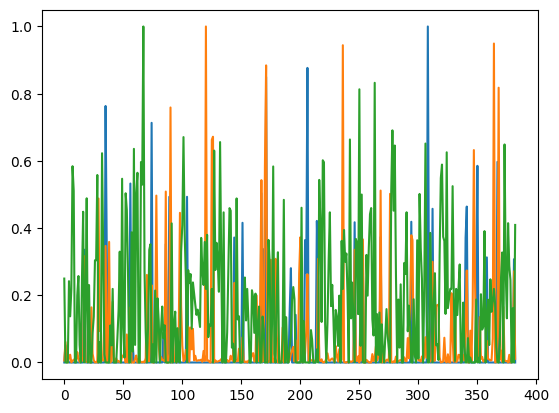

In [9]:
import matplotlib.pyplot as plt
plt.plot(impairment["impairment_index"])
plt.plot(impairment["autoencoder_index"])
plt.plot(impairment["auto_arima_index"])

In [10]:
# Explain the model
ebm, df, y = model.explain()

y has 1 na's
0      1.862694
1      1.073197
2      1.957010
3      1.189967
4      1.355063
         ...   
378    1.584806
379    0.186854
380    1.505173
381    0.909042
382    0.896607
Length: 383, dtype: float64
Mean Squared Error for the EBM model used to explain the model: 0.07401274755905143


<!-- http://127.0.0.1:7001/2972292582352/ -->

In [11]:
from interpret import show
show(ebm.explain_local(df, y))

<!-- http://127.0.0.1:7001/2972403238608/ -->

In [14]:
model.to_excel('./data/inventory_data_final.xlsx')